## Day 24 Lecture 1 Assignment

In this assignment, we will build our first logistic regression model on numeric data. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [47]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (
                corr_matrix.columns[j] not in col_corr
            ):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f"Deleted {colname} from dataset.")
                    del dataset[colname]

    return dataset

<IPython.core.display.Javascript object>

In [4]:
soccer_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv"
)

<IPython.core.display.Javascript object>

In [5]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


<IPython.core.display.Javascript object>

Our response for our logistic regression model is going to be a binary label, "Elite" or "Not Elite", corresponding to whether or not the player has an overall rating greater than or equal to 75. This corresponds to the top 10% or so of soccer players in the data set. Create the response column.

In [48]:
soccer_data["Elite"] = soccer_data["Overall"] >= 75
soccer_data["Elite"] = soccer_data["Elite"].astype(int)
soccer_data["Elite"].value_counts(normalize=True)

0    0.883947
1    0.116053
Name: Elite, dtype: float64

<IPython.core.display.Javascript object>

In [22]:
X = soccer_data.drop(columns=["ID", "Name", "Elite", "Overall"])
y = soccer_data["Elite"]

<IPython.core.display.Javascript object>

Address potential collinearity issues by removing the appropriate features. There is no universally agreed upon technique for doing so, so feel free to use any reasonable method. We have provided the convenience function *remove_correlated_features* at the top as one way of doing so, and we use a threshold of 0.9 for that function to reduce correlation among features.

In [16]:
# answer goes here
best_X = remove_correlated_features(X, 0.9)


best_X.head()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,94,84,95,70,90,86,97,93,94,87,...,72,59,94,48,22,94,94,75,96,33
1,94,84,94,89,81,87,88,81,76,77,...,88,79,93,63,29,95,82,85,95,28
2,92,79,87,62,84,84,96,88,87,78,...,81,49,82,56,36,89,87,81,94,27
3,91,93,82,55,92,82,86,85,83,91,...,90,75,91,76,61,87,94,79,88,68
4,91,81,84,61,89,80,95,83,79,83,...,83,66,80,54,41,87,89,86,91,34


<IPython.core.display.Javascript object>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1969
)

<IPython.core.display.Javascript object>

In [33]:
# Storing columns since we're going to overwrite
# X with a numpy array (which will delete its column names)
cols = X_train.columns

# Perform ANOVAs for each of our features and outcome
selector = SelectKBest(f_classif, k=4)
X_train = selector.fit_transform(X_train, y_train)

# We don't have to transform this back into a dataframe
# this is just being done for better display
selected_cols = cols[selector.get_support()]
X_train = pd.DataFrame(X_train, columns=selected_cols, index=y_train.index)
X_train.head()

,ShortPassing,BallControl,Reactions,Composure
2297,71,72,71,70
15122,54,53,54,48
1141,64,58,70,70
5770,67,66,68,64
3853,55,69,68,70


<IPython.core.display.Javascript object>

Split the data into train and test, with 80% training and 20% testing. Be sure to leave out columns that would not make sense in the model, like the player ID column.

In [8]:
# answer goes here





<IPython.core.display.Javascript object>

Fit the logistic regression model using the statsmodels package and print out the coefficient summary. Which variables appear to be the most important, and what effect do they have on the probability of a player being elite?

In [34]:
# answer goes here
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [35]:
model.score(X_train, y_train)

0.9464216484453749

<IPython.core.display.Javascript object>

In [36]:
X_test = selector.transform(X_test)
model.score(X_test, y_test)

0.9485271317829458

<IPython.core.display.Javascript object>

In [37]:
model.coef_


array([[0.09939954, 0.04615007, 0.28476647, 0.10996157]])

<IPython.core.display.Javascript object>

In [39]:
X_train.columns[2]

'Reactions'

<IPython.core.display.Javascript object>

In [43]:
# also want tot use testing data
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [44]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[2797,   46],
       [ 120,  262]], dtype=int64)

<IPython.core.display.Javascript object>

In [45]:
pd.DataFrame(
    confusion_mat,
    columns=["predicted_0 ", "predicted_1"],
    index=["actual_0", "actual_1"],
)

,predicted_0,predicted_1
actual_0,2797,46
actual_1,120,262


<IPython.core.display.Javascript object>

We have yet to discuss how to evaluate the model, which will happen next week, but one intuitive way to see if our model predictions are reasonable is to plot a calibration curve. In essence, the probabilities predicted by a good model will match the observed proportions of outcomes (i.e. If we take all of the predictions around 70% made by our model, the corresponding observed outcomes should be Elite about 70% of the time).

First, make predictions on the test set and join them to the corresponding true outcomes. Then, use the *calibration_curve* function in scikit learn to plot a calibration curve. What do you see?

There is some helpful code for creating calibration plots at the link below:
https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

In [40]:
# answer goes here


from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split



<IPython.core.display.Javascript object>

Logistic:
	Brier: 0.037
	Precision: 0.851
	Recall: 0.686
	F1: 0.759

Naive Bayes:
	Brier: 0.064
	Precision: 0.595
	Recall: 0.895
	F1: 0.715

Naive Bayes + Isotonic:
	Brier: 0.039
	Precision: 0.832
	Recall: 0.699
	F1: 0.760

Naive Bayes + Sigmoid:
	Brier: 0.045
	Precision: 0.728
	Recall: 0.814
	F1: 0.769

Logistic:
	Brier: 0.037
	Precision: 0.851
	Recall: 0.686
	F1: 0.759



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC:
	Brier: 0.203
	Precision: 0.664
	Recall: 0.869
	F1: 0.753



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC + Isotonic:
	Brier: 0.037
	Precision: 0.865
	Recall: 0.652
	F1: 0.743



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC + Sigmoid:
	Brier: 0.038
	Precision: 0.850
	Recall: 0.683
	F1: 0.758



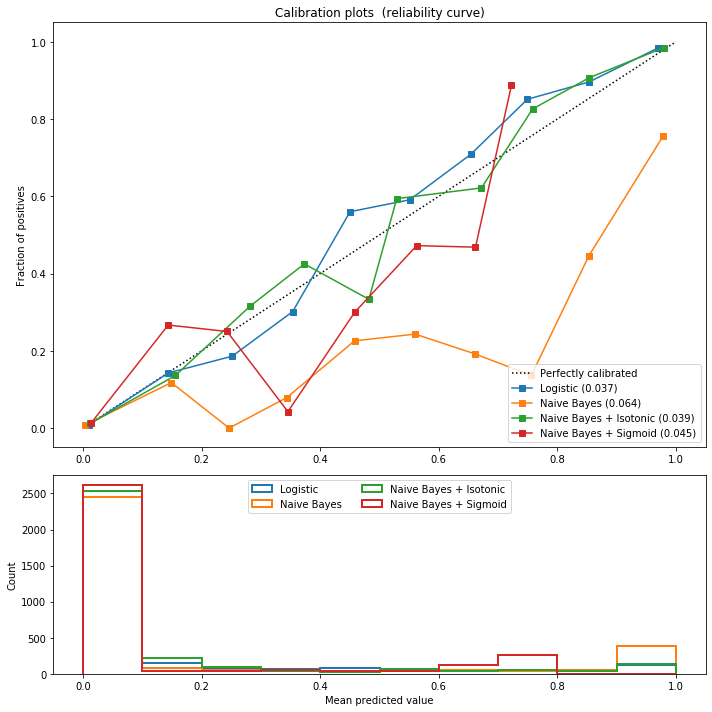

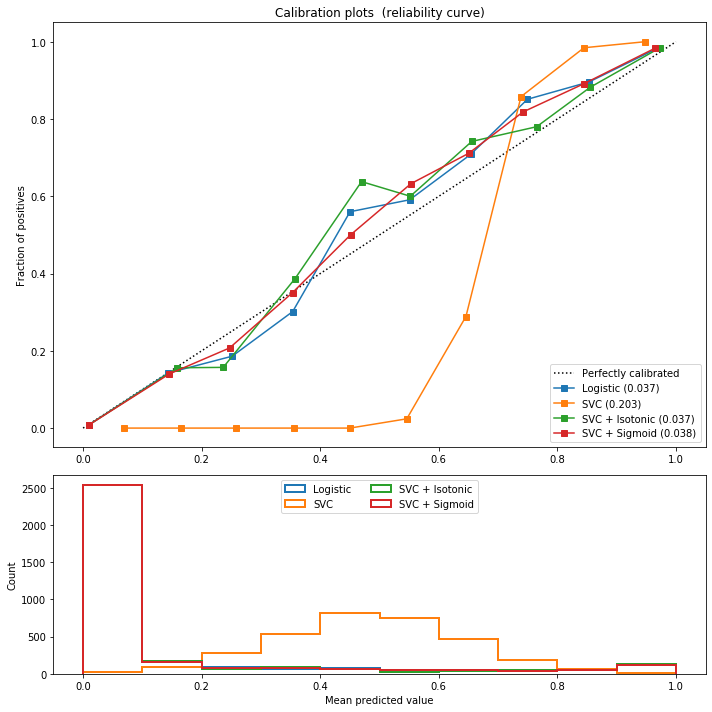

<IPython.core.display.Javascript object>

In [41]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method="isotonic")

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method="sigmoid")

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.0)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [
        (lr, "Logistic"),
        (est, name),
        (isotonic, name + " + Isotonic"),
        (sigmoid, name + " + Sigmoid"),
    ]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = calibration_curve(
            y_test, prob_pos, n_bins=10
        )

        ax1.plot(
            mean_predicted_value,
            fraction_of_positives,
            "s-",
            label="%s (%1.3f)" % (name, clf_score),
        )

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title("Calibration plots  (reliability curve)")

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()


# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(max_iter=10000), "SVC", 2)

plt.show()

We see that the lower predicted probabilities tend to be well calibrated - when the model predicts 20% likelihood of eliteness, for example, we tend to see about 20% in reality, which is a good sign. However, the calibration does falter quite a bit for the more confident predictions; weaker calibration at the extremes is fairly common for probabilistic models, although not always to this extent.